<a href="https://colab.research.google.com/github/benedictawinni/Movie-Industry-Analysis/blob/main/Benedicta_Winni_Lisachristanty_Progress_Script_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Investasi di Industri Film**

# Background:
- Investasi emas, saham, maupun real estates merupakan hal yang sudah banyak diperbincangkan. Namun, bagaimana jika investasi di industri film?
- Menurut [Investopedia](https://www.investopedia.com/financial-edge/0512/how-to-invest-in-movies.aspx), investasi di industri film sangat menguntungkan, namun juga memiliki risiko yang tinggi.
- Film yang dibuat bisa saja mendapatkan jutaan penonton, namun bisa juga hanya mendapat ribuan penonton. Hal inilah yang kemudian membuat investasi di industri film sangat berisiko dan jarang orang mempertimbangkan untuk investasi di industri film.
- Namun tidak ada salahnya apabila ingin memulai investasi di industri film. Untuk memulai investasi di industri film, hal yang perlu dipertimbangkan dengan matang adalah menentukan film mana yang dapat memberikan return yang tinggi di masa depan. Dengan demikian, akan dilakukan **analisis industri film** untuk menjawab kebimbangan seseorang dalam memulai investasi di industri film serta memberikan rekomendasi film yang seperti apa yang dapat memberikan return yang tinggi.

Analisis ini akan menggunakan data dari Kaggle: [Movie Industry](https://www.kaggle.com/datasets/danielgrijalvas/movies)

# Main Objectives:
- Fakor apa yang dapat mempengaruhi profit dari suatu film?
- Film dengan karakteristik seperti apa yang memberikan keuntungan dalam berinvestasi?

# Data Preprocessing

In [ ]:
# Import Library
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msnum

# Imputation
from sklearn.impute import KNNImputer

# Split Train Test Data
from sklearn.model_selection import train_test_split

# Check Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

# Standardization
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
# Import Data
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
# Data Shape
df.shape

(7668, 15)

In [ ]:
# Info Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


## Duplicate Values

In [ ]:
df.duplicated().sum()

0

Note: Tidak ada duplicate values

## Missing Values

In [ ]:
# Number of missing values for each variable
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [ ]:
# Proportion of missing values for each variable
df.isnull().sum()/len(df)

name        0.000000
rating      0.010042
genre       0.000000
year        0.000000
released    0.000261
score       0.000391
votes       0.000391
director    0.000000
writer      0.000391
star        0.000130
country     0.000391
budget      0.283125
gross       0.024648
company     0.002217
runtime     0.000522
dtype: float64

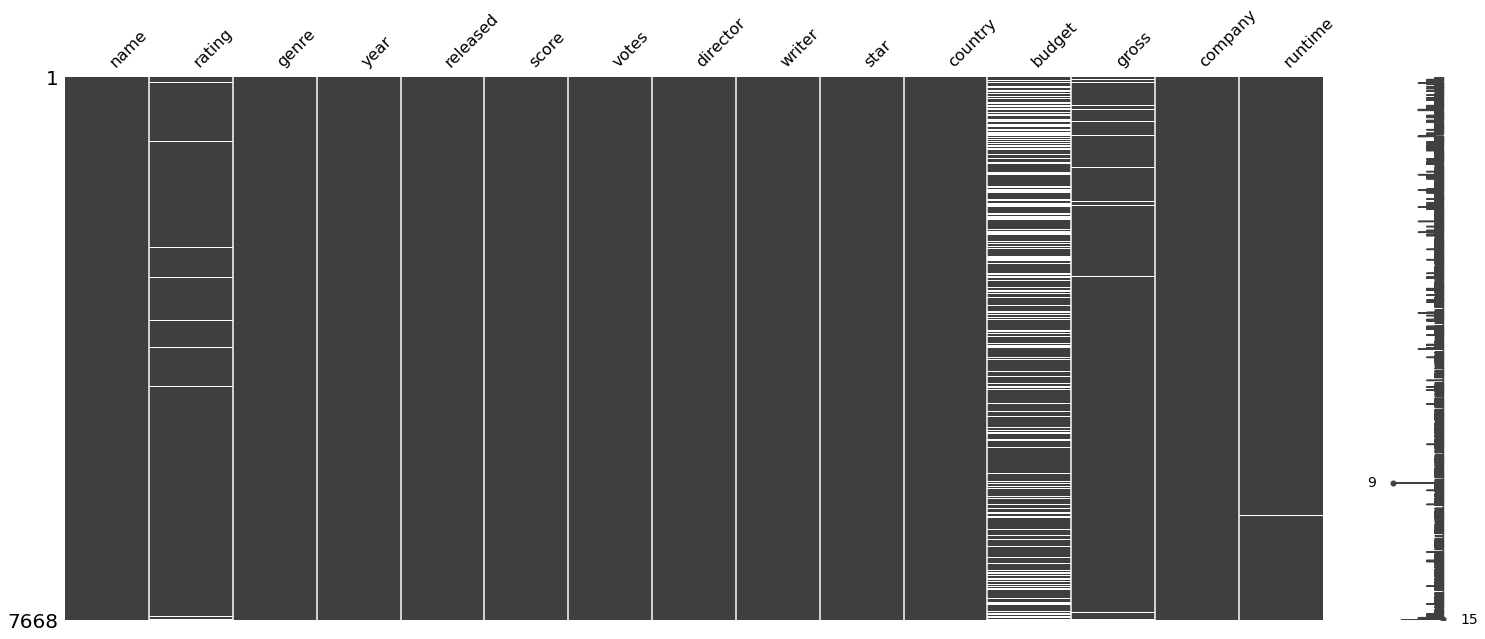

In [ ]:
# Heatmap for missing values
msnum.matrix(df)

Note:
- Variabel `released` tidak akan digunakan dalam analisis karena isi dari informasi variabel tersebut sudah terdapat pada variabel `year` dan `country`. Walaupun informasi tanggal released film tidak diketahui namun diasumsikan tanggal tersebut tidak terlalu berpengaruh dalam analisis ini karena sudah diwakili oleh tahun released.
- Variabel `rating`, `score`, `votes`, `writer`, `star`, `country`, `company`, dan `runtime` akan dilakukan drop rows yang missing karena proporsi missing values pada variabel tersebut kurang dari 5%.

In [ ]:
# Drop colomn released
df.drop(columns = ['released'], inplace = True)

In [ ]:
# Drop index containing missing values for colomn rating, score, votes, writer, star, country, company, and runtime
df.dropna(subset = ['rating', 'score', 'votes', 'writer', 'star', 'country', 'company', 'runtime'], inplace = True)

In [ ]:
# Updated proportion of missing values for each variable
df.isnull().sum()/len(df)

name        0.000000
rating      0.000000
genre       0.000000
year        0.000000
score       0.000000
votes       0.000000
director    0.000000
writer      0.000000
star        0.000000
country     0.000000
budget      0.277396
gross       0.021389
company     0.000000
runtime     0.000000
dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


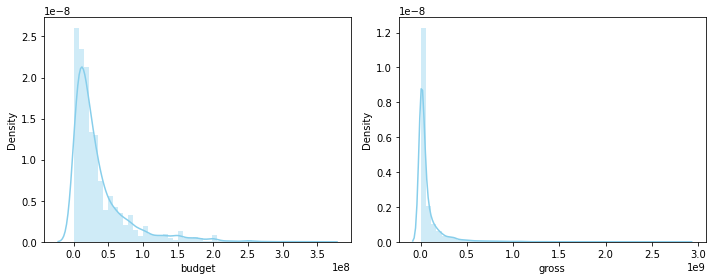

In [ ]:
# Checking budget and gross' distribution
plt.figure(figsize=(10,4))

features = ['budget','gross']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.distplot(x = df[features[i]], color = 'skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Note:
- Variabel `gross` dan `budget` memiliki skewed distribution.
- Karena kedua variabel tersebut memiliki skewed distribution, maka untuk menangani missing values tersebut akan dilakukan imputasi  dengan menggunakan nilai median.

Additional Note:
*Mengapa tidak menggunakan mean?*<br>
Karena apabila variabel memiliki skewed distribution, maka ada kemungkinan variabel tersebut mengandung outliers yang mana mean tidak robust terhadap outlier. Sebagai contoh, terdapat nilai 10, 10, 20, 30, 1000. Dalam nilai tersebut, 1000 dapat disebut sebagai outlier karena nilainya sangat berbeda dengan nilai lainnya. Apabila menggunakan mean, maka diperoleh nilai mean, yaitu 214. Sedangkan apabila menggunakan median, maka diperoleh nilai median, yaitu 20. Dengan demikian, nilai median lebih merepresentasikan populasi data daripada nilai mean.

In [ ]:
# Median Imputation for budget and gross
df['budget'] = df['budget'].fillna(df['budget'].median())
df['gross'] = df['gross'].fillna(df['gross'].median())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


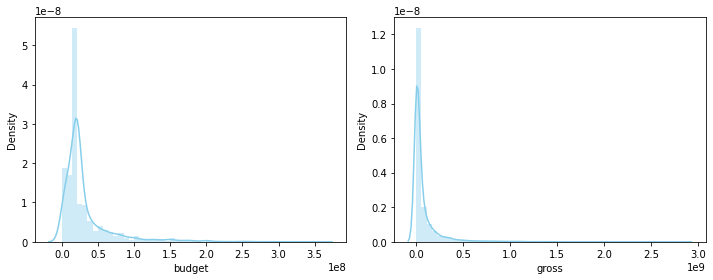

In [ ]:
# Checking updated budget and gross' distribution (after imputation)
plt.figure(figsize=(10,4))

features = ['budget','gross']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.distplot(x = df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

Solved! Tidak ada lagi missing values.

In [ ]:
df.shape

(7574, 14)

## Feature Extraction

Menambahkan kolom baru: `profit`

In [ ]:
# Add new colomn (profit: the difference between gross and budget)
df['profit'] = df['gross'] - df['budget']

In [ ]:
df[['gross', 'budget', 'profit']].head()

,gross,budget,profit
0,46998772.0,19000000.0,27998772.0
1,58853106.0,4500000.0,54353106.0
2,538375067.0,18000000.0,520375067.0
3,83453539.0,3500000.0,79953539.0
4,39846344.0,6000000.0,33846344.0


Melakukan regroup pada variabel `rating`

In [ ]:
df['rating'].value_counts()

R            3689
PG-13        2110
PG           1249
Not Rated     282
G             153
Unrated        50
NC-17          23
TV-MA           9
TV-PG           4
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

Note:
- Berdasarkan [Fandom](https://rating-system.fandom.com/wiki/TV-PG), TV-PG memiliki rating yang sama dengan PG sehingga TV-PG akan diubah menjadi PG.
- Berdasarkan [Atlas Cinemas](https://atlascinemas.net/ratings.html#:~:text=If%20a%20film%20has%20not,(UR)%20are%20often%20used.), Unrated memiliki arti yang sama dengan Not Rated sehingga akan diganti menjadi NR (Not Rated).
- Berdasarkan [Montana PBS](https://www.montanapbs.org/schedule/ratings-and-abbreviations/#:~:text=TV%2DMA%20Mature%20Audience%20Only,crude%20indecent%20language%20(L).), TV-MA (Mature Audience Only) memiliki rating yang sama dengan NC-17 sehingga TV-MA akan diubah menjadi NC-17.
- Berdasarkan [Wikipedia](https://en.wikipedia.org/wiki/X_rating), X di beberapa negara memiliki arti bahwa film tersebut hanya untuk orang dewasa sehingga sama dengan NC-17. Maka, X akan diubah menjadi NC-17.
- Dalam hal ini Approved tidak memiliki arti rating sehingga diasumsikan sebagai noise.
- Berdasarkan [Fandom](https://rating-system.fandom.com/wiki/TV-14), TV-14 memiliki arti yang sama dengan PG-13 sehingga akan diubah menjadi PG-13. 

In [ ]:
# Drop rating `approved`
df.drop(df[df['rating'] == 'Approved'].index, inplace = True)

In [ ]:
# Categorize rating
rating_dict = {
    'R':'R', 'PG-13':'PG-13', 'PG':'PG', 'Not Rated':'NR', 'G':'G',
    'Unrated':'NR', 'NC-17':'NC-17', 'TV-MA':'NC-17', 'TV-PG':'PG',
    'X': 'NC-17', 'TV-14':'PG-13'
}               
    
df['rating_new'] = df['rating'].map(rating_dict)
df.drop(columns = ['rating'], inplace = True)
df.rename(columns = {'rating_new':'rating'}, inplace = True)

In [ ]:
df['rating'].value_counts()

R        3689
PG-13    2111
PG       1253
NR        332
G         153
NC-17      35
Name: rating, dtype: int64

In [ ]:
df.head()

,name,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,profit,rating
0,The Shining,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,27998772.0,R
1,The Blue Lagoon,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,54353106.0,R
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,520375067.0,PG
3,Airplane!,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,79953539.0,PG
4,Caddyshack,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,33846344.0,R


## Data Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7573 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7573 non-null   object 
 1   genre     7573 non-null   object 
 2   year      7573 non-null   int64  
 3   score     7573 non-null   float64
 4   votes     7573 non-null   float64
 5   director  7573 non-null   object 
 6   writer    7573 non-null   object 
 7   star      7573 non-null   object 
 8   country   7573 non-null   object 
 9   budget    7573 non-null   float64
 10  gross     7573 non-null   float64
 11  company   7573 non-null   object 
 12  runtime   7573 non-null   float64
 13  profit    7573 non-null   float64
 14  rating    7573 non-null   object 
dtypes: float64(6), int64(1), object(8)
memory usage: 946.6+ KB


In [ ]:
# Correcting data types
df['name'] = df['name'].astype('category')
df['rating'] = df['rating'].astype('category')
df['genre'] = df['genre'].astype('category')
df['votes'] = df['votes'].astype('int64')
df['director'] = df['director'].astype('category')
df['writer'] = df['writer'].astype('category')
df['star'] = df['star'].astype('category')
df['country'] = df['country'].astype('category')
df['company'] = df['company'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7573 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      7573 non-null   category
 1   genre     7573 non-null   category
 2   year      7573 non-null   int64   
 3   score     7573 non-null   float64 
 4   votes     7573 non-null   int64   
 5   director  7573 non-null   category
 6   writer    7573 non-null   category
 7   star      7573 non-null   category
 8   country   7573 non-null   category
 9   budget    7573 non-null   float64 
 10  gross     7573 non-null   float64 
 11  company   7573 non-null   category
 12  runtime   7573 non-null   float64 
 13  profit    7573 non-null   float64 
 14  rating    7573 non-null   category
dtypes: category(8), float64(5), int64(2)
memory usage: 1.3 MB


## Noise

In [ ]:
df.describe()

,year,score,votes,budget,gross,runtime,profit
count,7573.000000,7573.000000,7.573000e+03,7.573000e+03,7.573000e+03,7573.000000,7.573000e+03
mean,2000.379638,6.389740,8.895179e+04,3.163752e+07,7.774581e+07,107.290110,4.610829e+07
std,11.107359,0.967865,1.640499e+05,3.588178e+07,1.646575e+08,18.585732,1.399562e+08
min,1980.000000,1.900000,3.500000e+01,3.000000e+03,3.090000e+02,63.000000,-1.580311e+08
25%,1991.000000,5.800000,9.400000e+03,1.400000e+07,4.842699e+06,95.000000,-1.265891e+07
50%,2000.000000,6.500000,3.300000e+04,2.100000e+07,2.040352e+07,104.000000,1.957975e+06
75%,2010.000000,7.100000,9.400000e+04,3.200000e+07,7.403672e+07,116.000000,4.289267e+07
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000,2.610246e+09


In [ ]:
df.select_dtypes('category').describe()

,name,genre,director,writer,star,country,company,rating
count,7573,7573,7573,7573,7573,7573,7573,7573
unique,7419,18,2899,4473,2755,59,2339,6
top,Hercules,Comedy,Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures,R
freq,3,2230,38,37,43,5445,377,3689


Note:
- Berdasarkan statistika deskriptif di atas, secara keseluruhan tidak ada noise pada data.
- Data terdiri dari 7.574 judul film yang release pada tahun 1980 hingga 2020.
- Dari seluruh data, film didominasi dengan rating R (restricted) dan film bergenre komedi.
- Director dan penulis yang paling banyak dalam pembuatan film adalah Woody Allen.
- Aktor yang paling sering menjadi pemeran utama dalam film adalah Nicolas Cage yang mana ia sudah membintangi sebanyak 43 film.
- Kebanyakan film pada data berasal dari Amerika Serikat dan perusahaan produksinya adalah Universal Pictures.
- Terdapat beberapa film yang mengalami kerugian. Hal ini dilihat dari `profit` yang bernilai negatif.

# EDA

## Outliers Analysis

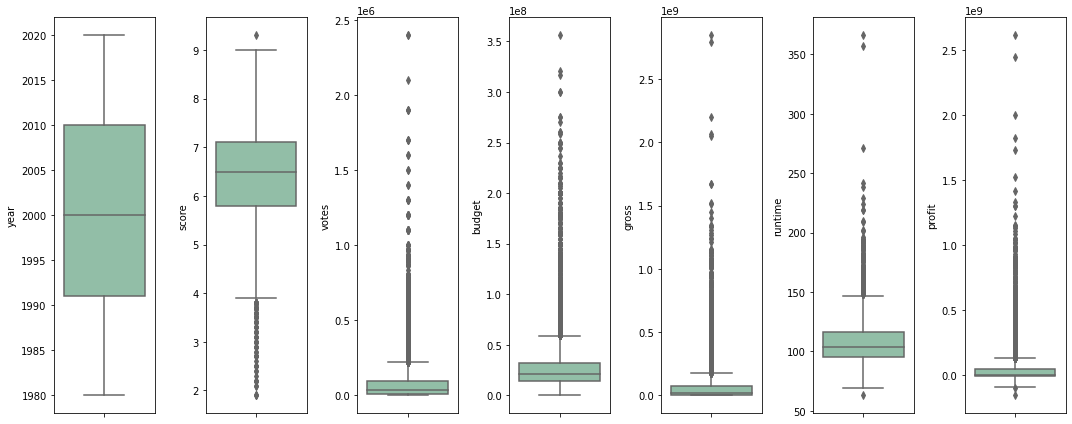

In [ ]:
# Detecting outliers using boxplot
plt.figure(figsize=(15,6))

features = ['year', 'score', 'votes', 'budget', 'gross', 'runtime', 'profit']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y = df[features[i]], color = '#8BC5A7')
    plt.tight_layout()

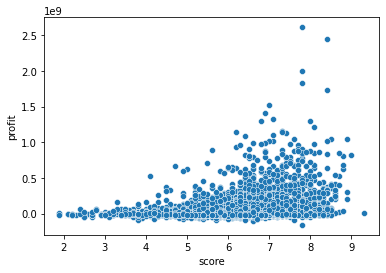

In [ ]:
# Detecting outliers using scatterplot
sns.scatterplot(x = df['score'], y = df['profit'])

Note: Dalam hal ini outliers tidak akan dikeluarkan dari penelitian karena ketika dilakukan *trail and error* dalam membangun model apabila outliers dikelurakan akan menurunkan performa model.

## Finding 1
Perkembangan jumlah film dari tahun 1980 hingga 2020

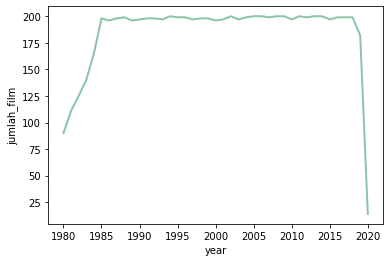

In [ ]:
df_temp = df.groupby(['year']).agg(
    jumlah_film = ('name','count')
    ).reset_index()

sns.lineplot(x = df_temp['year'], y = df_temp['jumlah_film'],
             color = '#8BC5A7', linewidth = 2)

Note:
- Di tahun 2020, baru ada 14 judul film. Hal ini perlu menjadi catatan dalam analisis selanjutnya. Sebagai contoh, apabila pada tahun 2020, jumlah maupun rata-rata profit mengalami penurunan pada setiap genre, maka hal ini belum dapat dipastikan bahwa memang profit mengalami penurunan di setiap genre namun bisa jadi karena jumlah film yang sedikit menyebabkan jumlah maupun rata-rata profit juga sedikit.
- Jika kembali mengingat peristiwa yang terjadi di tahun 2020, di mana seluruh negara mengalami dampak COVID-19. Maka hal ini dapat menjadi salah satu alasan yang menyebabkan jumlah film di tahun 2020 hanyalah 14 judul film. Hal ini dikarenakan keterbatasan mobilitas saat pandemi sehingga tidak dapat dilakukan syuting maupun produksi film.


Rekomendasi:
- Perlu dilihat perkembangan film di tahun 2021 dan 2022 di mana kasus pandemi mulai menurun.

## Finding 2
Genre dengan profit terbesar dalam 10 tahun terakhir (2010-2020)

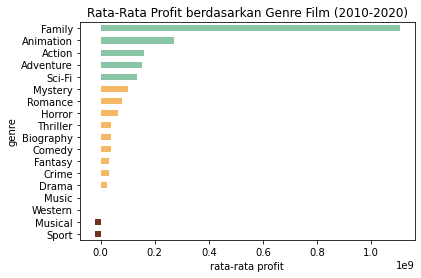

In [ ]:
# Grouping data based on genre
df_temp = df.copy()
df_temp.drop(df_temp[df_temp['year'] < 2010].index, inplace = True)
df_temp = df_temp.groupby(['genre']).agg(
    mean_profit = ('profit', 'mean')
).reset_index()

# Fill genre 'western' and 'music' with 0 since those genre were not produced within 2010-2020
df_temp['mean_profit'].fillna(0, inplace = True)

# Sort values
df_temp.sort_values(by = 'mean_profit', ascending = True, inplace = True)

# Visualization
df_temp.plot.barh(y = 'mean_profit', x = 'genre',
                  title = 'Rata-Rata Profit berdasarkan Genre Film (2010-2020)',
                  color = ('#6D3220','#6D3220','#F4B867','#F4B867','#F4B867','#F4B867',
                           '#F4B867','#F4B867','#F4B867','#F4B867','#F4B867','#F4B867',
                           '#F4B867','#8BC5A7','#8BC5A7','#8BC5A7','#8BC5A7','#8BC5A7'),
                  legend = None)
plt.xlabel('rata-rata profit')
plt.show()

Note:
- Top 5 genre: Family, Animation, Action, Adventure, dan Sci-Fi
- Film bergenre Music dan Western tidak diproduksi pada 10 tahun terakhir
- Film bergenre Musical dan Sport mengalami kerugian dalam 10 tahun terakhir


Rekomendasi:
- Tidak disarankan untuk berinvestasi pada film bergenre Music dan Western karena tidak ada produksi pada 10 tahun terakhir dan perlu dianalisis lebih lanjut apabila terdapat film bergenre Music dan Western pada tahun 2021-2022.
- Tidak disarankan untuk berinvestasi pada film bergenre Musical dan Sport karena mengalami kerugian dalam 10 tahun terakhir.

## Finding 3
Rating dengan profit terbesar dalam 10 tahun terakhir (2010-2020)

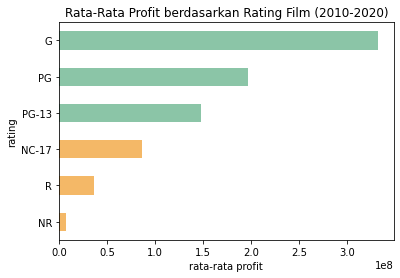

In [ ]:
# Grouping data based on genre
df_temp = df.copy()
df_temp.drop(df_temp[df_temp['year'] < 2010].index, inplace = True)
df_temp = df_temp.groupby(['rating']).agg(
    mean_profit = ('profit', 'mean')
).reset_index()

# Sort values
df_temp.sort_values(by = 'mean_profit', ascending = True, inplace = True)

# Visualization
df_temp.plot.barh(y = 'mean_profit', x = 'rating',
                  title = 'Rata-Rata Profit berdasarkan Rating Film (2010-2020)',
                  color = ('#F4B867','#F4B867','#F4B867','#8BC5A7','#8BC5A7','#8BC5A7'),
                  legend = None)
plt.xlabel('rata-rata profit')
plt.show()

Note:
- Top 3 rating: G, PG, PG-13
- Bottom 3 rating: NC-17, R, NR

Rekomendasi:
- Disarankan untuk berinvestasi pada film dengan rating G, PG, atau PG-13 karena berdasarkan data pada 2010-2020 ketiga rating tersebut memiliki rata-rata profit terbesar.
- Hal ini dikarenakan film dengan ketiga rating tersebut dapat ditonton oleh semua kalangan sehingga memberikan lebih banyak penonton sekaligus profit yang dicapai.

## Finding 4
Perkembangan profit film yang termasuk dalam top 5 genre dari tahun 1980 hingga 2020

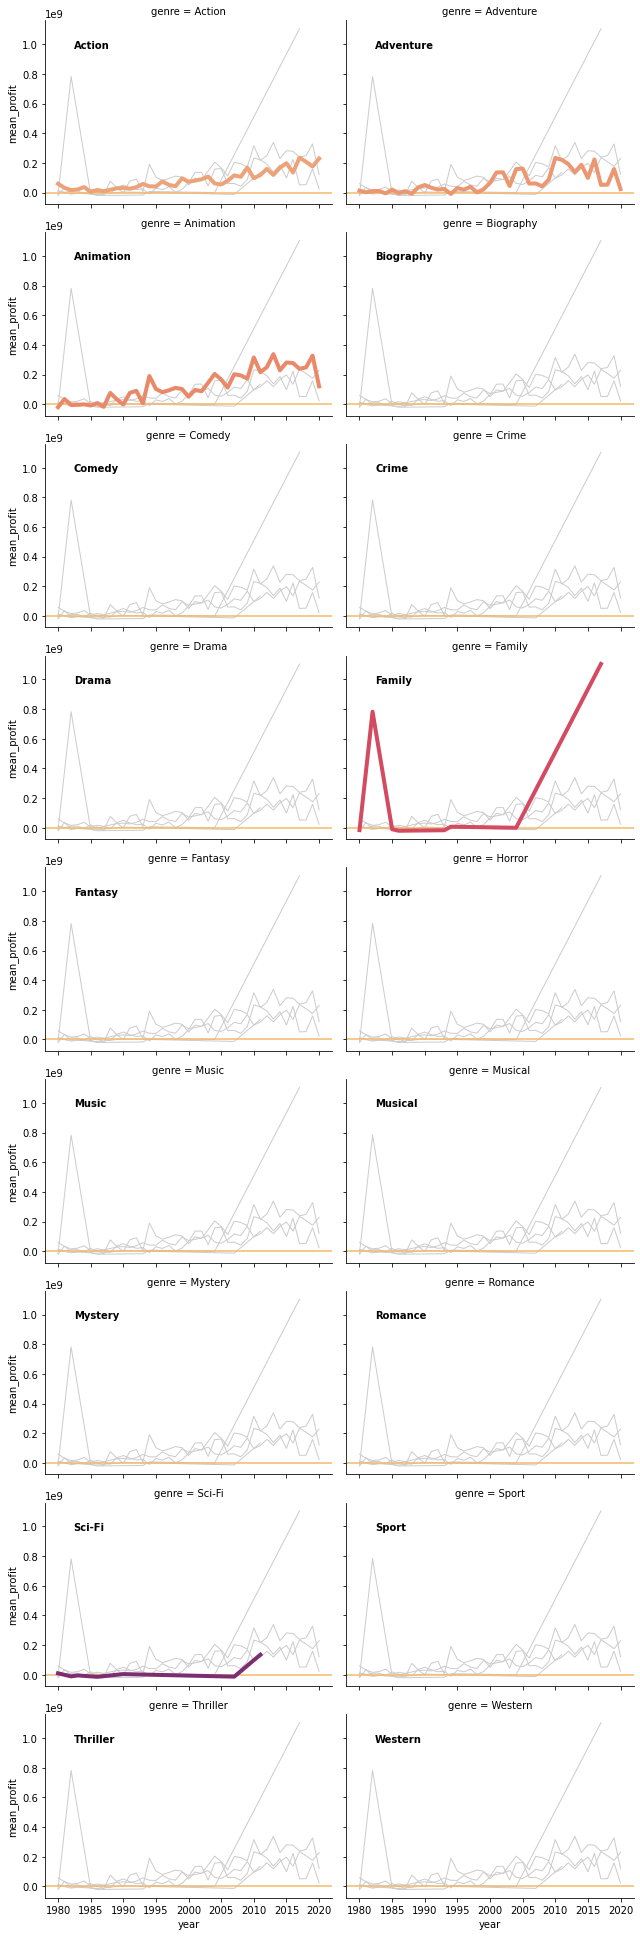

In [ ]:
# Grouping data based on genre 
df_temp = df.groupby(['year','genre']).agg(
    mean_profit = ('profit','mean')
    ).reset_index()

# Choose top 5 genre
df_temp = df_temp[(df_temp['genre'] == 'Family') |
                  (df_temp['genre'] == 'Animation') |
                  (df_temp['genre'] == 'Action') |
                  (df_temp['genre'] == 'Adventure') |
                  (df_temp['genre'] == 'Sci-Fi')]

# Visualization
g = sns.relplot(data = df_temp, x = 'year', y = 'mean_profit',
               col = 'genre', hue = 'genre',
               kind = 'line', palette = 'flare',
               linewidth = 4, zorder = 5,
               col_wrap = 2, height = 3, aspect = 1.5, legend = False)

for time, ax in g.axes_dict.items(): 
  ax.text(.1, .85, time,
          transform = ax.transAxes, fontweight = 'bold')
  sns.lineplot(data = df_temp, x = 'year', y = 'mean_profit',
               units = 'genre', estimator = None, color = '.8',
               linewidth = 1, ax = ax).axhline(0, color = '#F4B867')
   
g.tight_layout()

In [ ]:
# Profit on Sci-Fi film over the years
df_temp = df.groupby(['year','genre']).agg(
    mean_profit = ('profit','mean')
    ).reset_index()
df_temp.dropna(inplace = True)
df_temp[df_temp['genre'] == 'Sci-Fi']

,year,genre,mean_profit
14,1980,Sci-Fi,9403521.5
50,1982,Sci-Fi,-11092686.0
68,1983,Sci-Fi,-4780540.0
122,1986,Sci-Fi,-14100000.0
194,1990,Sci-Fi,4228953.0
500,2007,Sci-Fi,-13011315.0
572,2011,Sci-Fi,134849455.0


Note:
- Film bergenre family mengalami peningkatan rata-rata profit pada 15 tahun ke belakang. Namun, perlu menjadi catatan bahwa rata-rata profit di tahun 1985 hingga 2004 mendekati 0 bahkan sempat mencapai minus (mengalami kerugian) pada tahun 1985 hingga 1994.
- Laju peningkatan rata-rata profit film bergenre Action, Adventure, dan Animation cenderung sama dengan laju yang fluktuatif
- Film bergenre Sci-fi terakhir diproduksi tahun 2011 dan beberapa kali mengalami kerugian.


Rekomendasi:
- Walaupun Sci-Fi termasuk top 5 genre dengan rata-rata profit yang terbesar, tidak terdaoat produksi pada tahun 2010-2020.
- Disarankan untuk berinvestasi pada film bergenre Family, Action, Animation, dan Adventure karena walaupun fluktuatif namun dari tahun ke waktu hasil plot cenderung mengalami peningkatan.

## Pairwise Correlation

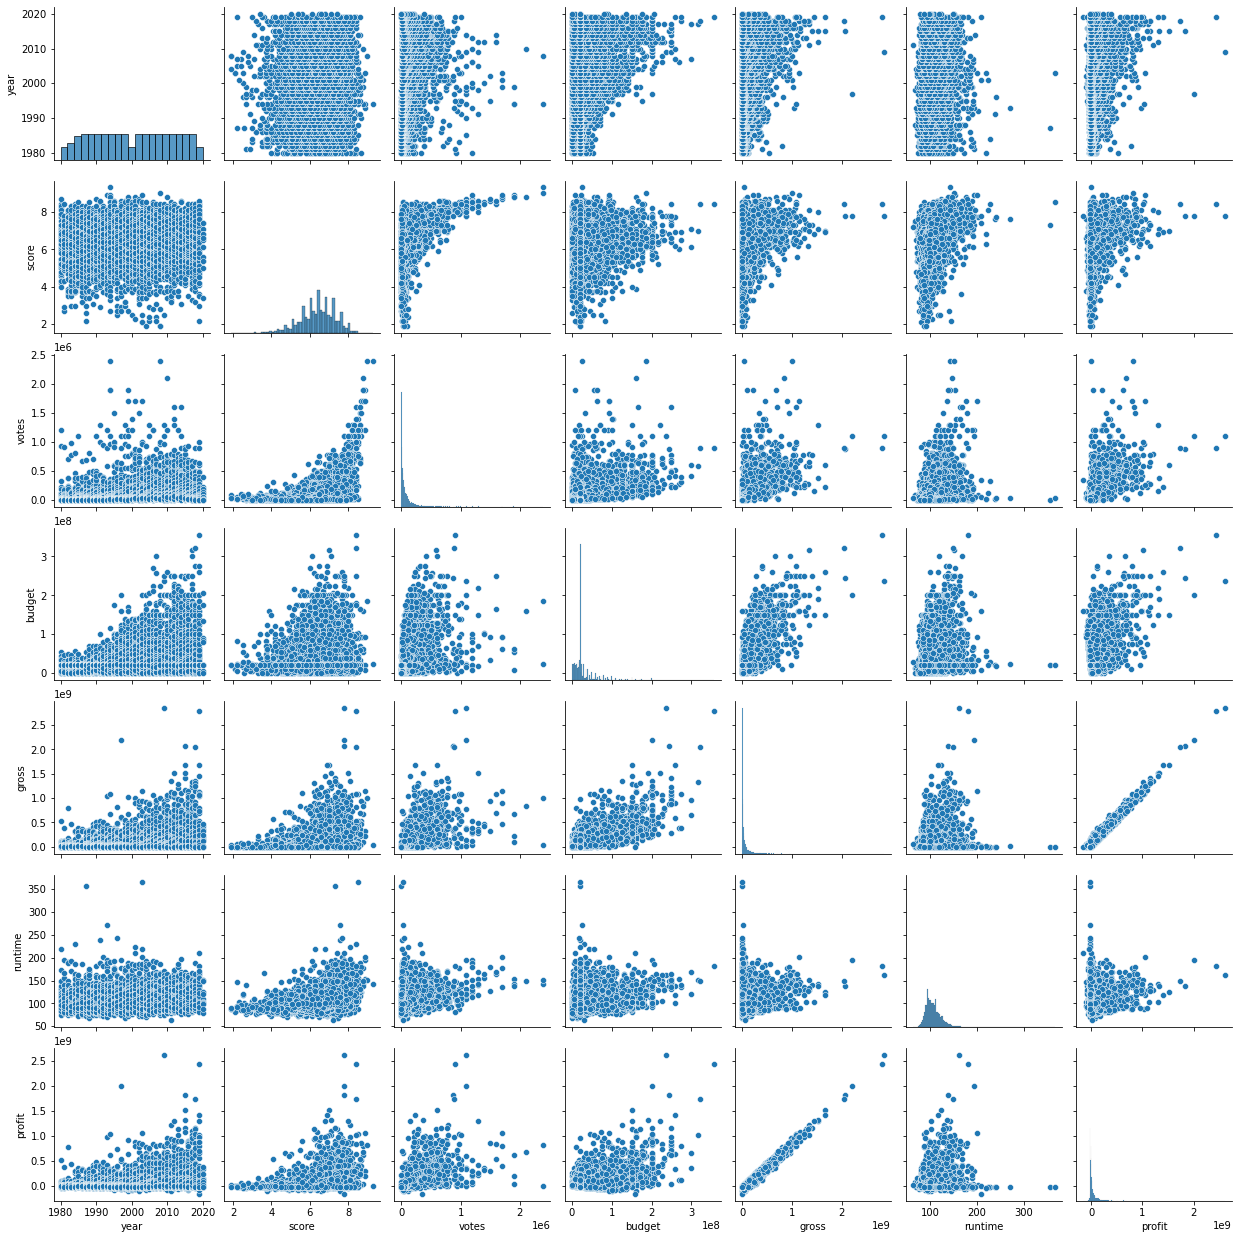

In [ ]:
sns.pairplot(df)

## Heatmap Correlation

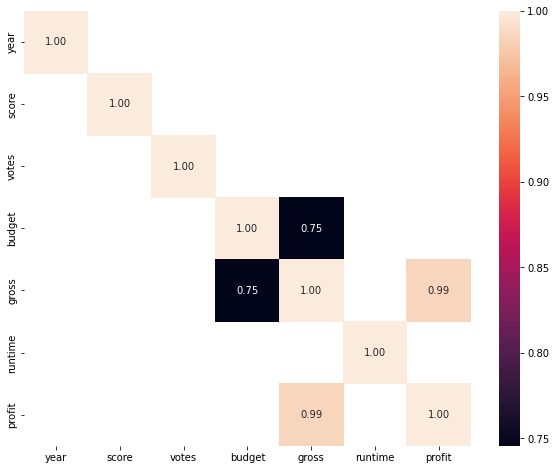

In [ ]:
# Correlation
corr = df.corr()

# Visualization
plt.figure(figsize = (10, 8))
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], annot = True, fmt = '.2f')
plt.show()

# Modeling

Note:
- `name`, `director`, `writer`, `star`, `country`, dan `company` tidak akan dimasukkan dalam model karena memiliki lebih dari 20 kategori sehingga dapat mengurangi kecenderungan model untuk overfitting.
- `gross` juga tidak akan dimasukkan dalam model karena ketika dilakukan *trial and error* dalam membuat model apabila `gross` dimasukkan ke dalam model maka `gross` akan memprediksi profit dengan sangat baik (overfitting). Hal ini didukung oleh pairwise correlation pada pembahasan sebelumnya yang mana `gross` memiliki korelasi positif yang kuat dengan `profit`.

In [ ]:
# Drop unused variables
df_model = df.copy()
df_model.drop(columns = ['name','director','writer','star','country','company','gross'], inplace = True)

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7573 entries, 0 to 7659
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   genre    7573 non-null   category
 1   year     7573 non-null   int64   
 2   score    7573 non-null   float64 
 3   votes    7573 non-null   int64   
 4   budget   7573 non-null   float64 
 5   runtime  7573 non-null   float64 
 6   profit   7573 non-null   float64 
 7   rating   7573 non-null   category
dtypes: category(2), float64(4), int64(2)
memory usage: 687.9 KB


## One-Hot Encoding

In [ ]:
# One-hot encoding for genre and rating
df_model = df_model.join(pd.get_dummies(df_model['genre'], prefix = 'genre'))
df_model = df_model.join(pd.get_dummies(df_model['rating'], prefix = 'rating'))

# Drop previous variables (genre and rating)
df_model.drop(columns = 'genre', inplace = True)
df_model.drop(columns = 'rating', inplace = True)

df_model.head()

,year,score,votes,budget,runtime,profit,genre_Action,genre_Adventure,genre_Animation,genre_Biography,...,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_Western,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R
0,1980,8.4,927000,19000000.0,146.0,27998772.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1980,5.8,65000,4500000.0,104.0,54353106.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1980,8.7,1200000,18000000.0,124.0,520375067.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1980,7.7,221000,3500000.0,88.0,79953539.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1980,7.3,108000,6000000.0,98.0,33846344.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Splitting Dataset (Train-Test)

In [ ]:
# Split train test
feature = df_model.drop(columns = ['profit'])
target = df_model[['profit']]

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = 0.2, random_state = 42)

## Checking Multicollinearity

In [ ]:
feature_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6058 entries, 6747 to 7335
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             6058 non-null   int64  
 1   score            6058 non-null   float64
 2   votes            6058 non-null   int64  
 3   budget           6058 non-null   float64
 4   runtime          6058 non-null   float64
 5   genre_Action     6058 non-null   uint8  
 6   genre_Adventure  6058 non-null   uint8  
 7   genre_Animation  6058 non-null   uint8  
 8   genre_Biography  6058 non-null   uint8  
 9   genre_Comedy     6058 non-null   uint8  
 10  genre_Crime      6058 non-null   uint8  
 11  genre_Drama      6058 non-null   uint8  
 12  genre_Family     6058 non-null   uint8  
 13  genre_Fantasy    6058 non-null   uint8  
 14  genre_Horror     6058 non-null   uint8  
 15  genre_Music      6058 non-null   uint8  
 16  genre_Musical    6058 non-null   uint8  
 17  genre_Myste

In [ ]:
# Calculate VIF to check multicollinearity
X = add_constant(feature_train[['year','score','votes','budget','runtime']])
df_vif = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])],
                      index = X.columns).reset_index()
df_vif.columns = ['feature','vif score']
df_vif = df_vif.loc[df_vif.feature != 'const']
df_vif

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif score
1,year,1.112736
2,score,1.406117
3,votes,1.574806
4,budget,1.439015
5,runtime,1.288493


Note: Tidak ada multikolinieritas karena nilai VIF dari semua features (tanpa categorical features) kurang dari 10.

## Standardization
Karena beberapa variabel memiliki skewed distribution, maka akan digunakan standarisasi

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

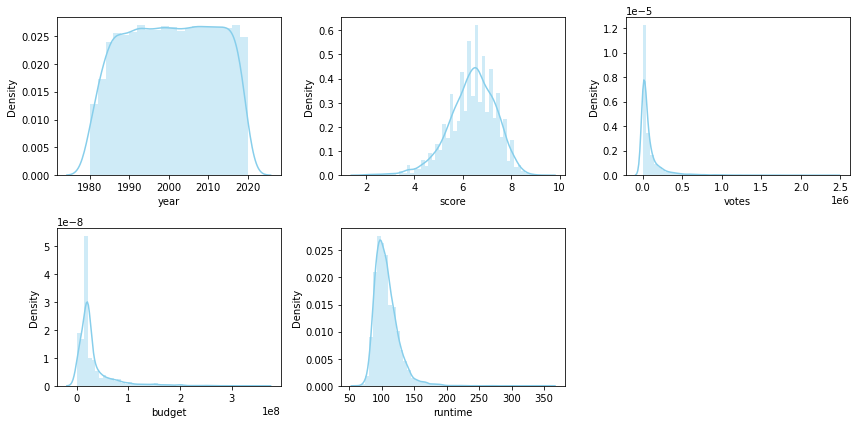

In [ ]:
# Distribution for numerical variables in data training
plt.figure(figsize=(12,6))

features = ['year','score','votes','budget','runtime']
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.distplot(x = feature_train[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
feature_train.head()

,year,score,votes,budget,runtime,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,...,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_Western,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R
6747,2015,6.6,60000,11000000.0,95.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
338,1983,7.2,34000,8000000.0,105.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4611,2004,6.5,12000,21000000.0,93.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1995,1991,5.0,4800,21000000.0,89.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4297,2003,8.0,141000,10000000.0,178.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Standardization on data training
scaler = StandardScaler()
feature_train[['year','score','votes','budget','runtime']] = scaler.fit_transform(feature_train[['year','score','votes','budget','runtime']])

In [ ]:
feature_train.head()

,year,score,votes,budget,runtime,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,...,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_Western,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R
6747,1.317200,0.217872,-0.180557,-0.574193,-0.673564,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
338,-1.579041,0.835838,-0.335527,-0.655939,-0.130900,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4611,0.321617,0.114878,-0.466655,-0.301704,-0.782097,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1995,-0.854981,-1.430036,-0.509570,-0.301704,-0.999162,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4297,0.231109,1.659792,0.302235,-0.601441,3.830543,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Multiple Linear Regression

### Model Training

In [ ]:
# Define Model
multi_reg = LinearRegression()

# Train the model
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train,))

# Fit the model
multi_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Retrieve the coefficients
data = feature_train
model = multi_reg

df_coef = pd.DataFrame({
    'feature': ['intercept'] + data.columns.tolist(),
    'coefficient': [model.intercept_] + list(model.coef_)
})

df_coef

,feature,coefficient
0,intercept,5.965059e+07
1,year,2.584193e+06
2,score,2.428765e+06
3,votes,6.247801e+07
4,budget,5.774783e+07
5,runtime,-5.305590e+04
6,genre_Action,-1.807881e+07
7,genre_Adventure,-1.072810e+07
8,genre_Animation,4.568536e+07
9,genre_Biography,-2.449305e+07


In [ ]:
# Same model (to check significant variables)
feature_train1 = feature_train.copy()
target_train1 = target_train.copy()
feature_train1 = sm.add_constant(feature_train1)
model = sm.OLS(target_train1, feature_train1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     272.7
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:17:32   Log-Likelihood:            -1.2008e+05
No. Observations:                6058   AIC:                         2.402e+05
Df Residuals:                    6030   BIC:                         2.404e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -4.09e+19   1.44e+20     

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Model Diagnostic

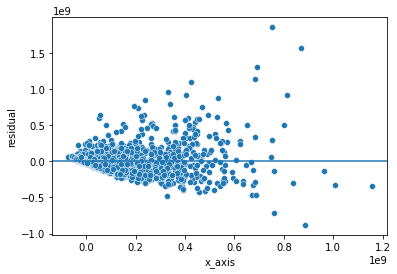

In [ ]:
# Calculate residuals
y_predict_train = multi_reg.predict(X_train)
residual = y_train - y_predict_train

# Define dataframe for residuals
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# Visualize residual plot
sns.scatterplot(data = df_resid, x = 'x_axis', y = 'residual')
plt.axhline(0)
plt.show()

Note: Asumsi heterogenitas tidak terpenuhi

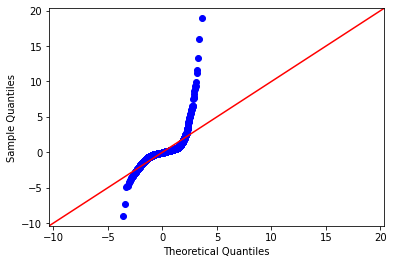

In [ ]:
# QQplot
std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

sm.qqplot(std_resid, line = '45')
plt.show()

Note: Asumsi normalitas tidak terpenuhi

### Model Evaluation

Training Error

In [ ]:
# Define X_test and y_predict_test
X_train = feature_train.to_numpy()
y_predict_train = multi_reg.predict(X_train)

# Ground truth target
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

print('MAE for data training of Multiple Linear Regression model is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('RMSE for data training of Multiple Linear Regression model is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))

MAE for data training of Multiple Linear Regression model is 49302066.24292109
RMSE for data training of Multiple Linear Regression model is 98178785.81582823


Testing Error

In [ ]:
# Define X_test and y_predict_test
X_test = feature_test.to_numpy()
y_predict_test = multi_reg.predict(X_test)

# Ground truth target
y_test = target_test.to_numpy()
y_test = y_test.reshape(len(y_test),)

print('MAE for data testing of Multiple Linear Regression model is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('RMSE for data testing of Multiple Linear Regression model is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))

MAE for data testing of Multiple Linear Regression model is 1731851949402676.5
RMSE for data testing of Multiple Linear Regression model is 2549898100765335.5


## Ridge Regression

### Model Training

In [ ]:
# Define Model
ridge_reg = Ridge(alpha = 0.1, random_state = 42)

# Train the model
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train,))

# Fit the model
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1, random_state=42)

In [ ]:
# Retrieve the coefficients
data = feature_train
model = ridge_reg

df_coef = pd.DataFrame({
    'feature': ['intercept'] + data.columns.tolist(),
    'coefficient': [model.intercept_] + list(model.coef_)
})

df_coef

,feature,coefficient
0,intercept,5.995943e+07
1,year,2.583731e+06
2,score,2.431448e+06
3,votes,6.247734e+07
4,budget,5.775151e+07
5,runtime,-5.762017e+04
6,genre_Action,-1.837557e+07
7,genre_Adventure,-1.103756e+07
8,genre_Animation,4.532736e+07
9,genre_Biography,-2.478270e+07


### Model Evaluation

Training Error

In [ ]:
# Define X_test and y_predict_test
X_train = feature_train.to_numpy()
y_predict_train = ridge_reg.predict(X_train)

# Ground truth target
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

print('MAE for data training of Ridge Regression model is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('RMSE for data training of Ridge Regression model is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))

MAE for data training of Ridge Regression model is 49301522.1785984
RMSE for data training of Ridge Regression model is 98178871.73224986


Testing Error

In [ ]:
# Define X_test and y_predict_test
X_test = feature_test.to_numpy()
y_predict_test = ridge_reg.predict(X_test)

# Ground truth target
y_test = target_test.to_numpy()
y_test = y_test.reshape(len(y_test),)

print('MAE for data testing of Ridge Regression model is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('RMSE for data testing of Ridge Regression model is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))

MAE for data testing of Ridge Regression model is 1731961797309738.8
RMSE for data testing of Ridge Regression model is 2550059920592202.5


## Lasso Regression

### Model Training

In [ ]:
# Define Model
lasso_reg = Lasso(alpha = 0.1, random_state = 42)

# Train the model
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train,))

# Fit the model
lasso_reg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.753e+18, tolerance: 1.297e+16
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1, random_state=42)

In [ ]:
# Retrieve the coefficients
data = feature_train
model = lasso_reg

df_coef = pd.DataFrame({
    'feature': ['intercept'] + data.columns.tolist(),
    'coefficient': [model.intercept_] + list(model.coef_)
})

df_coef

,feature,coefficient
0,intercept,4.414115e+07
1,year,2.584192e+06
2,score,2.428764e+06
3,votes,6.247801e+07
4,budget,5.774783e+07
5,runtime,-5.305646e+04
6,genre_Action,-8.471404e+06
7,genre_Adventure,-1.120690e+06
8,genre_Animation,5.529276e+07
9,genre_Biography,-1.488563e+07


### Model Evaluation

Training Error

In [ ]:
# Define X_test and y_predict_test
X_train = feature_train.to_numpy()
y_predict_train = lasso_reg.predict(X_train)

# Ground truth target
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

print('MAE for data training of Lasso Regression model is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('RMSE for data training of Lasso Regression model is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))

MAE for data training of Lasso Regression model is 49302066.18632514
RMSE for data training of Lasso Regression model is 98178785.81582953


Testing Error

In [ ]:
# Define X_test and y_predict_test
X_test = feature_test.to_numpy()
y_predict_test = lasso_reg.predict(X_test)

# Ground truth target
y_test = target_test.to_numpy()
y_test = y_test.reshape(len(y_test),)

print('MAE for data testing of Lasso Regression model is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('RMSE for data testing of Lasso Regression model is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))

MAE for data testing of Lasso Regression model is 1731851962087328.0
RMSE for data testing of Lasso Regression model is 2549898119445452.5


## Hyperparameter Tuning for Ridge and Lasso

### Splitting Datastet (Train-Test_Validation)

In [ ]:
# Split train test
feature = df_model.drop(columns = ['profit'])
target = df_model[['profit']]

feature_pretrain, feature_test, target_pretrain, target_test = train_test_split(feature, target, test_size = 0.2, random_state = 42)
feature_train, feature_validation, target_train, target_validation = train_test_split(feature_pretrain, target_pretrain, test_size = 0.2, random_state = 42)

### Ridge Regression

#### Model Training

In [ ]:
# Define Model
ridge_reg_pointzeroone = Ridge(alpha = 0.01, random_state = 42)
ridge_reg_pointone = Ridge(alpha = 0.1, random_state = 42)
ridge_reg_one = Ridge(alpha = 1, random_state = 42)
ridge_reg_ten = Ridge(alpha = 10, random_state = 42)

# Train the model
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train,))

# Fit the model
ridge_reg_pointzeroone.fit(X_train, y_train)
ridge_reg_pointone.fit(X_train, y_train)
ridge_reg_one.fit(X_train, y_train)
ridge_reg_ten.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.545e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.54477e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.54263e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.52448e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=10, random_state=42)

In [ ]:
# Find the best model (alpha) based on validation set
# Train the model (validation set)
X_validation = feature_validation.to_numpy()
y_validation = target_validation.to_numpy()
y_validation = y_validation.reshape(len(y_validation,))

# Define alphas and models
alphas = [0.01, 0.1, 1, 10]
models = [ridge_reg_pointzeroone, ridge_reg_pointone, ridge_reg_one, ridge_reg_ten]

# Looping to check RMSE for each model
for model, alpha in zip(models, alphas):
  y_predict_validation = model.predict(X_validation)
  rmse = np.sqrt(mean_squared_error(y_validation, y_predict_validation))
  print(f'RMSE of Ridge Regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge Regression model with alpha = 0.01 is 101972729.41664337
RMSE of Ridge Regression model with alpha = 0.1 is 101827435.12175691
RMSE of Ridge Regression model with alpha = 1 is 100845656.68661469
RMSE of Ridge Regression model with alpha = 10 is 99348595.59377937


Note: Alpha terbaik adalah 10

In [ ]:
# Retrieve the coefficients (alpha = 10)
data = feature_train
model = ridge_reg_ten

df_coef = pd.DataFrame({
    'feature': ['intercept'] + data.columns.tolist(),
    'coefficient': [model.intercept_] + list(model.coef_)
})

df_coef

,feature,coefficient
0,intercept,-2.536493e+08
1,year,1.067508e+05
2,score,2.989456e+06
3,votes,3.703694e+02
4,budget,1.647054e+00
5,runtime,-3.012571e+04
6,genre_Action,-2.406420e+07
7,genre_Adventure,-1.889136e+07
8,genre_Animation,3.770643e+07
9,genre_Biography,-2.564499e+07


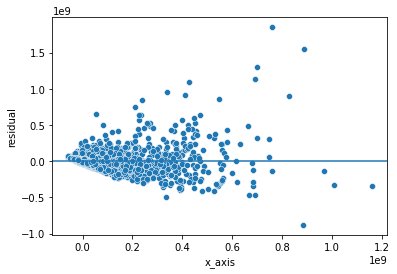

In [ ]:
# Calculate residuals
y_predict_train = ridge_reg_ten.predict(X_train)
residual = y_train - y_predict_train

# Define dataframe for residuals
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# Visualize residual plot
sns.scatterplot(data = df_resid, x = 'x_axis', y = 'residual')
plt.axhline(0)
plt.show()

#### Model Evaluation

Training Error (alpha = 10)

In [ ]:
# Define X_test and y_predict_test
X_train = feature_train.to_numpy()
y_predict_train = ridge_reg_ten.predict(X_train)

# Ground truth target
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)
#from sklearn.metrics import r2_score
#print('R-squared for data training is {}'.format(r2_score(y_train, y_predict_train)))
print('MAE for data training of Ridge Regression model is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('RMSE for data training of Ridge Regression model is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))

MAE for data training of Ridge Regression model is 48914129.75453074
RMSE for data training of Ridge Regression model is 98049388.18614909


Testing Error (alpha = 10)

In [ ]:
# Define X_test and y_predict_test
X_test = feature_test.to_numpy()
y_predict_test = ridge_reg_ten.predict(X_test)

# Ground truth target
y_test = target_test.to_numpy()
y_test = y_test.reshape(len(y_test),)

print('MAE for data testing of Ridge Regression model is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('RMSE for data testing of Ridge Regression model is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))

MAE for data testing of Ridge Regression model is 44624793.61147485
RMSE for data testing of Ridge Regression model is 75278893.54747032


### Lasso Regression

#### Model Training

In [ ]:
# Define Model
lasso_reg_pointzeroone = Lasso(alpha = 0.01, random_state = 42)
lasso_reg_pointone = Lasso(alpha = 0.1, random_state = 42)
lasso_reg_one = Lasso(alpha = 1, random_state = 42)
lasso_reg_ten = Lasso(alpha = 10, random_state = 42)

# Train the model
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train,))

# Fit the model
lasso_reg_pointzeroone.fit(X_train, y_train)
lasso_reg_pointone.fit(X_train, y_train)
lasso_reg_one.fit(X_train, y_train)
lasso_reg_ten.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.207e+19, tolerance: 1.038e+16
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.035e+19, tolerance: 1.038e+16
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.654e+18, tolerance: 1.038e+16

Lasso(alpha=10, random_state=42)

In [ ]:
# Find the best model (alpha) based on validation set
# Train the model (validation set)
X_validation = feature_validation.to_numpy()
y_validation = target_validation.to_numpy()
y_validation = y_validation.reshape(len(y_validation,))

# Define alphas and models
alphas = [0.01, 0.1, 1, 10]
models = [lasso_reg_pointzeroone, lasso_reg_pointone, lasso_reg_one, lasso_reg_ten]

# Looping to check RMSE for each model
for model, alpha in zip(models, alphas):
  y_predict_validation = model.predict(X_validation)
  rmse = np.sqrt(mean_squared_error(y_validation, y_predict_validation))
  print(f'RMSE of Lasso Regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso Regression model with alpha = 0.01 is 101970416.96264958
RMSE of Lasso Regression model with alpha = 0.1 is 101970414.87413648
RMSE of Lasso Regression model with alpha = 1 is 101970393.98931623
RMSE of Lasso Regression model with alpha = 10 is 101970185.17221195


Note: Alpha terbaik adalah 10

In [ ]:
# Retrieve the coefficients (alpha = 10)
data = feature_train
model = lasso_reg_ten

df_coef = pd.DataFrame({
    'feature': ['intercept'] + data.columns.tolist(),
    'coefficient': [model.intercept_] + list(model.coef_)
})

df_coef

,feature,coefficient
0,intercept,-2.640538e+08
1,year,1.040957e+05
2,score,2.699974e+06
3,votes,3.700962e+02
4,budget,1.634872e+00
5,runtime,-1.240222e+04
6,genre_Action,-1.161791e+07
7,genre_Adventure,-5.973577e+06
8,genre_Animation,5.574805e+07
9,genre_Biography,-1.407272e+07


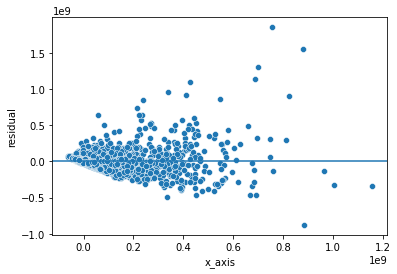

In [ ]:
# Calculate residuals
y_predict_train = lasso_reg_ten.predict(X_train)
residual = y_train - y_predict_train

# Define dataframe for residuals
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# Visualize residual plot
sns.scatterplot(data = df_resid, x = 'x_axis', y = 'residual')
plt.axhline(0)
plt.show()

#### Model Evaluation

Training Error (alpha = 10)

In [ ]:
# Define X_test and y_predict_test
X_train = feature_train.to_numpy()
y_predict_train = lasso_reg_ten.predict(X_train)

# Ground truth target
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)
from sklearn.metrics import r2_score
print('R-squared for data training is {}'.format(r2_score(y_train, y_predict_train)))
print('MAE for data training of Lasso Regression model is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('RMSE for data training of Lasso Regression model is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))

R-squared for data training is 0.5548170209099388
MAE for data training of Lasso Regression model is 48803728.36638259
RMSE for data training of Lasso Regression model is 97660076.98745576


Testing Error (alpha = 10)

In [ ]:
# Define X_test and y_predict_test
X_test = feature_test.to_numpy()
y_predict_test = lasso_reg_ten.predict(X_test)

# Ground truth target
y_test = target_test.to_numpy()
y_test = y_test.reshape(len(y_test),)

print('MAE for data testing of Lasso Regression model is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('RMSE for data testing of Lasso Regression model is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))

MAE for data testing of Lasso Regression model is 45464112.61582615
RMSE for data testing of Lasso Regression model is 78781448.27694641


# Actionable Insights

- Fakor apa yang dapat mempengaruhi profit dari suatu film adalah votes dan budget. Semakin banyak orang yang votes film tersebut, maka semakin profit akan meningkat sebesar 62.490.000 dolar US. Selain itu, dengan penambahan 1 unit budget dengan variabel lain tetap, maka akan meningkatkan profit sebesar 57.730.000 dolar US.
- Karakteristik yang dapat memberikan: genre film Family, Action, Animation, Adventure; rating G, PG,atau PG-13; score film yang tinggi; budget film tinggi (diekspektasi memberikan profit tinggi).